In [1]:
import unicodecsv
import pandas as pd

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
people_filename = './data/people.csv'
people = read_csv(people_filename)

people[0]

{'32': '',
 'Age': '30',
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': '0',
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': '10'}

In [2]:
# Look for duplicate in the ref value
print (len(people))
unique_people = set()
duplicate = list()
for person in people:
    if person['REF'] in unique_people:
        duplicate.append(person['REF'])
    unique_people.add(person['REF'])
print (len(unique_people))
print(duplicate)

437
437
[]


In [3]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return 0
    else:
        return int(i)

for person in people:
    person['Age'] = parse_maybe_int(person['Age'])
    person['Number of kids'] = parse_maybe_int(person['Number of kids'])
    person['Years of studies'] = parse_maybe_int(person['Years of studies'])
    
people[0]

{'32': '',
 'Age': 30,
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': 0,
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': 10}

In [4]:
df_people = pd.DataFrame(people)
df_people.head()

,32,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,REF,Type of school,Years of studies
0,,30,Adult,Australia,,F,Phd Student,0,Sydney,AUS001,"Law, Health",10
1,,32,Adult,China,,F,Former Consultant,0,Paris,CHN01,Engineering,5
2,,69,Adult,France,,F,Retiree,3,Cucq,FR001,,1
3,,58,Adult,France,,M,Farmer,2,La Caloterie,FR002,,0
4,,28,Adult,Madagascar,,F,Singer,0,Paris,MAD001,,3


In [5]:
# Categories for quantitative attributes
categories = [
    {
        'index':'Age', 'indexCategory':'AgeCategory',
        'bins': [0, 10, 20, 30, 40, 50, 60, 200], 'labels': ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60','60+']
    },
    {
        'index':'Years of studies', 'indexCategory':'YearsStudiesCategory',
        'bins': [0, 3, 5, 8, 20], 'labels': ['0-3', '3-5', '5-8', '8+']
    },
    {
        'index':'Number of kids', 'indexCategory':'NumberKidsCategory',
        'bins': [0, 0.1, 1, 3, 5, 20], 'labels': ['0', '1', '2-3', '3-5', '5+']
    }
]

# Create all category from nquantitative attribute
for i in range(len(categories)):
    df_people[categories[i]['indexCategory']] = pd.cut( 
        df_people[categories[i]['index']], 
        bins=categories[i]['bins'], 
        include_lowest=True, 
        labels=categories[i]['labels']
    )

df_people.head()


,32,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,REF,Type of school,Years of studies,AgeCategory,YearsStudiesCategory,NumberKidsCategory
0,,30,Adult,Australia,,F,Phd Student,0,Sydney,AUS001,"Law, Health",10,20-30,8+,0
1,,32,Adult,China,,F,Former Consultant,0,Paris,CHN01,Engineering,5,30-40,3-5,0
2,,69,Adult,France,,F,Retiree,3,Cucq,FR001,,1,60+,0-3,2-3
3,,58,Adult,France,,M,Farmer,2,La Caloterie,FR002,,0,50-60,0-3,2-3
4,,28,Adult,Madagascar,,F,Singer,0,Paris,MAD001,,3,20-30,0-3,0


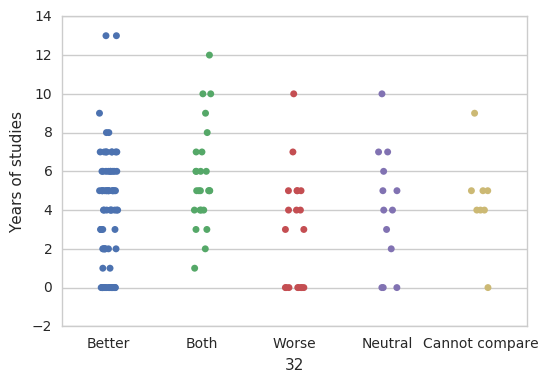

In [12]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

df_32 = df_people[df_people['32'] != '']
#sns.lmplot('Age', 'Years of studies', data=df_people, fit_reg=False)
#sns.stripplot(x="32", y="Age", data=df_people, jitter=True);
#sns.stripplot(x="32", y="Age", data=df_32, jitter=True);
sns.stripplot(x="32", y="Years of studies", data=df_32, jitter=True);
#sns.swarmplot(x="32", y="Age", hue="Gender", data=df_32)

#heat map ? https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

In [ ]:
# Categories for qualitative attributes



In [11]:
from SPARQLWrapper import SPARQLWrapper, JSON
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

def getPopulation(name):
    queryName = """SELECT ?city ?cityLabel ?population WHERE {
    ?city (wdt:P31/wdt:P279*) wd:Q515.
    ?city ?label """ + name + """@en.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],nl". }
    OPTIONAL { ?city wdt:P1082 ?population. }
    }
    LIMIT 10"""
    sparql.setQuery(queryName)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    if len(results['results']['bindings']) != 0:
        results_df = pd.io.json.json_normalize(results['results']['bindings'])
        return results_df[['city.value', 'cityLabel.value', 'population.value']]
    else:
        return "Not found"
    
getPopulation('"Paris"')




,city.value,cityLabel.value,population.value
0,http://www.wikidata.org/entity/Q934294,Paris,5183
1,http://www.wikidata.org/entity/Q538772,Paris,4411
2,http://www.wikidata.org/entity/Q2219239,Q2219239,754
3,http://www.wikidata.org/entity/Q90,Parijs,2206488
4,http://www.wikidata.org/entity/Q79917,Paris,3532
5,http://www.wikidata.org/entity/Q576584,Paris,8837
6,http://www.wikidata.org/entity/Q830149,Paris,25171
7,http://www.wikidata.org/entity/Q830149,Paris,25171
8,http://www.wikidata.org/entity/Q960025,Paris,1220
9,http://www.wikidata.org/entity/Q984459,Paris,576
